In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:36<00:00, 24.3MB/s]
100% 812M/812M [00:36<00:00, 23.4MB/s]


In [ ]:
from zipfile import ZipFile
dataset = "/content/dogs-vs-cats.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
from zipfile import ZipFile
dataset = "/content/train.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
import os
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("Number of Images : ", file_count)

Number of Images :  25000


In [ ]:
file_names = os.listdir("/content/train")
print(file_names)

['dog.10160.jpg', 'dog.6063.jpg', 'cat.5313.jpg', 'cat.9171.jpg', 'cat.9108.jpg', 'dog.8173.jpg', 'cat.698.jpg', 'dog.793.jpg', 'cat.7096.jpg', 'dog.6641.jpg', 'dog.167.jpg', 'cat.5322.jpg', 'cat.6312.jpg', 'cat.912.jpg', 'dog.8905.jpg', 'cat.11027.jpg', 'cat.3310.jpg', 'cat.7164.jpg', 'dog.11836.jpg', 'dog.3290.jpg', 'cat.9916.jpg', 'dog.11061.jpg', 'dog.10009.jpg', 'dog.12141.jpg', 'dog.2320.jpg', 'dog.9224.jpg', 'cat.1986.jpg', 'cat.3622.jpg', 'cat.10836.jpg', 'cat.10282.jpg', 'dog.5329.jpg', 'cat.8799.jpg', 'dog.2754.jpg', 'dog.7682.jpg', 'cat.1211.jpg', 'cat.2487.jpg', 'dog.9728.jpg', 'cat.11443.jpg', 'dog.3862.jpg', 'cat.4746.jpg', 'dog.12433.jpg', 'cat.9333.jpg', 'dog.9566.jpg', 'cat.5287.jpg', 'dog.12057.jpg', 'cat.6484.jpg', 'dog.11316.jpg', 'dog.3384.jpg', 'cat.6420.jpg', 'cat.11080.jpg', 'cat.2523.jpg', 'cat.10044.jpg', 'dog.5578.jpg', 'dog.2296.jpg', 'cat.1572.jpg', 'cat.2938.jpg', 'cat.8101.jpg', 'cat.9907.jpg', 'dog.3451.jpg', 'dog.8011.jpg', 'cat.3167.jpg', 'cat.5775.jpg

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

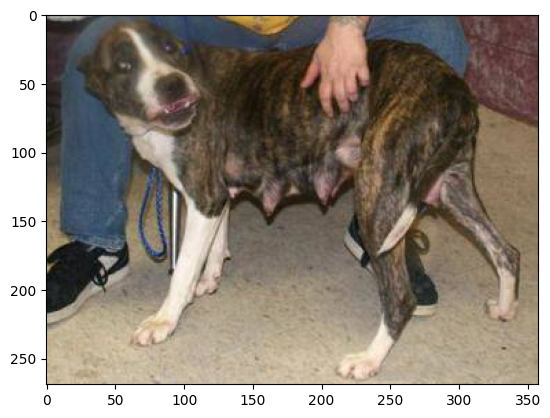

In [ ]:
img = mpimg.imread("/content/train/dog.8949.jpg")
imgplt = plt.imshow(img)
plt.show()

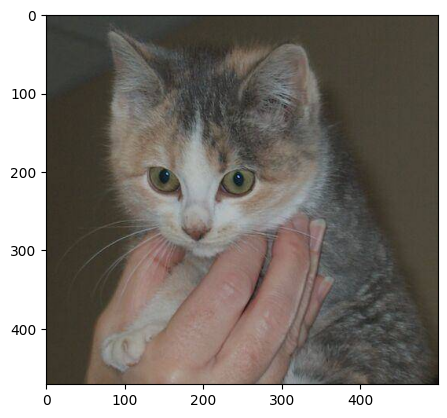

In [ ]:
img = mpimg.imread("/content/train/cat.10002.jpg")
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir("/content/train")
for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
dog
cat
cat
cat


In [ ]:
file_names = os.listdir("/content/train")
dog_count = 0
cat_count = 0

In [ ]:
for img_file in file_names:
  name = img_file[0:3]
  if name == "dog":
    dog_count += 1
  else:
    cat_count += 1
print("Number of Dog Images : ", dog_count)
print("Number of Cat Images : ", cat_count)

Number of Dog Images :  12500
Number of Cat Images :  12500


In [ ]:
os.mkdir("/content/images_resized")

In [ ]:
original_folder = "/content/train/"
resized_folder = "/content/images_resized/"
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')
  newImgPath = resized_folder + filename
  img.save(newImgPath)

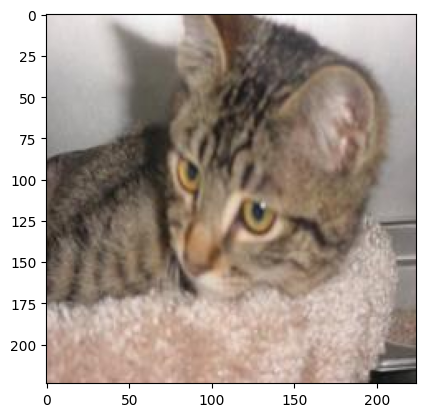

In [ ]:
img = mpimg.imread("/content/images_resized/cat.10031.jpg")
imgplt = plt.imshow(img)
plt.show()

In [ ]:
filenames = os.listdir("/content/images_resized")
labels = []
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == "dog":
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.10160.jpg', 'dog.6063.jpg', 'cat.5313.jpg', 'cat.9171.jpg', 'cat.9108.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 0]
2000


In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1012  988]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = "/content/images_resized/"
image_extension = ["png", "jpg"]
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[122 112 112]
   [119 111 111]
   [119 111 111]
   ...
   [ 50  26  38]
   [ 47  22  36]
   [ 43  18  32]]

  [[122 112 112]
   [120 112 112]
   [120 112 112]
   ...
   [ 55  31  43]
   [ 51  27  39]
   [ 46  22  34]]

  [[122 112 112]
   [121 113 113]
   [123 116 113]
   ...
   [ 55  34  43]
   [ 51  30  39]
   [ 46  25  34]]

  ...

  [[ 63  47  54]
   [ 70  54  61]
   [ 74  60  64]
   ...
   [ 52  85 124]
   [ 45  78 117]
   [ 42  75 114]]

  [[ 72  56  63]
   [ 71  55  62]
   [ 66  52  56]
   ...
   [ 50  83 122]
   [ 42  78 116]
   [ 41  77 115]]

  [[ 78  62  69]
   [ 69  53  60]
   [ 57  43  47]
   ...
   [ 50  83 122]
   [ 51  87 125]
   [ 55  91 129]]]


 [[[ 27  35  48]
   [ 26  34  47]
   [ 26  34  47]
   ...
   [ 22  33  37]
   [ 23  34  38]
   [ 20  31  35]]

  [[ 27  35  48]
   [ 27  35  48]
   [ 26  34  47]
   ...
   [ 22  33  37]
   [ 23  34  38]
   [ 20  31  35]]

  [[ 27  35  48]
   [ 27  35  48]
   [ 26  34  47]
   ...
   [ 22  33  37]
   [ 23  34  38]
   [ 20  31

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
x = dog_cat_images
y = np.asarray(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable = False)
num_of_classes = 2
model = tf.keras.Sequential([
  pretrained_model,
  tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["acc"]
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 10s 48ms/step - loss: 0.1864 - acc: 0.9244
Epoch 2/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0669 - acc: 0.9806
Epoch 3/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0464 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 3s 54ms/step - loss: 0.0359 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 2s 47ms/step - loss: 0.0284 - acc: 0.9925


In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print("Test Loss : ", score)
print("Test Accuracy : ", acc)

13/13 [==============================] - 2s 105ms/step - loss: 0.0782 - acc: 0.9700
Test Loss :  0.0782330334186554
Test Accuracy :  0.9700000286102295


Path of the Image to be Predicted : /content/Test image.jpg


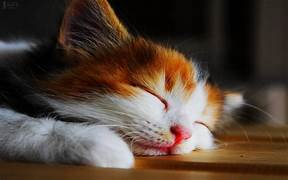

1/1 [==============================] - 0s 25ms/step
[[ 4.781723 -3.400223]]
0
The Image represents a Cat


In [ ]:
input_image_path = input("Path of the Image to be Predicted : ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshape = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshape)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print("The Image represents a Cat")
else:
  print("The Image represents a Dog")